In [1]:
import pandas as pd
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(color_codes=True) 
mpl.rcParams['figure.figsize'] = [20, 10] #default figure size

In [2]:
df = pd.read_csv('fulldata(+18dis).csv')

In [3]:
df

,District,SA (ft2),Price(HK$),Date,Floor,Price/ft2(SA),Estate,District1
0,Tsuen Wan Town Centre,391,12500,2022-04-30 00:00:00,L,31.97,Victory Court,KWAI TSING
1,Sai Wan Ho,210,10800,2022-04-30 00:00:00,H,51.43,Parker33,EASTERN
2,Olympic Station,548,21500,2022-04-30 00:00:00,H,39.23,The Long Beach,YAU TSIM MONG
3,Lohas Park,807,26800,2022-04-30 00:00:00,M,33.21,Lohas Park,SAI KUNG
4,Lohas Park,775,21000,2022-04-30 00:00:00,H,27.10,Lohas Park,SAI KUNG
...,...,...,...,...,...,...,...,...
9906,Yau Tong,687,22500,2021-10-06,M,32.75,LAGUNA CITY,KWUN TONG
9907,Yau Tong,517,16300,2021-10-06,M,31.53,LAGUNA CITY,KWUN TONG
9908,Tseung Kwan O,364,15000,2021-10-05,H,41.21,METRO CITY,SAI KUNG
9909,Tseung Kwan O,484,14500,2021-10-05,L,29.96,BEVERLY GDN,SAI KUNG


In [4]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True,exact=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   District       9911 non-null   object        
 1   SA (ft2)       9911 non-null   int64         
 2   Price(HK$)     9911 non-null   int64         
 3   Date           9911 non-null   datetime64[ns]
 4   Floor          9911 non-null   object        
 5   Price/ft2(SA)  9911 non-null   float64       
 6   Estate         9911 non-null   object        
 7   District1      9911 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 619.6+ KB


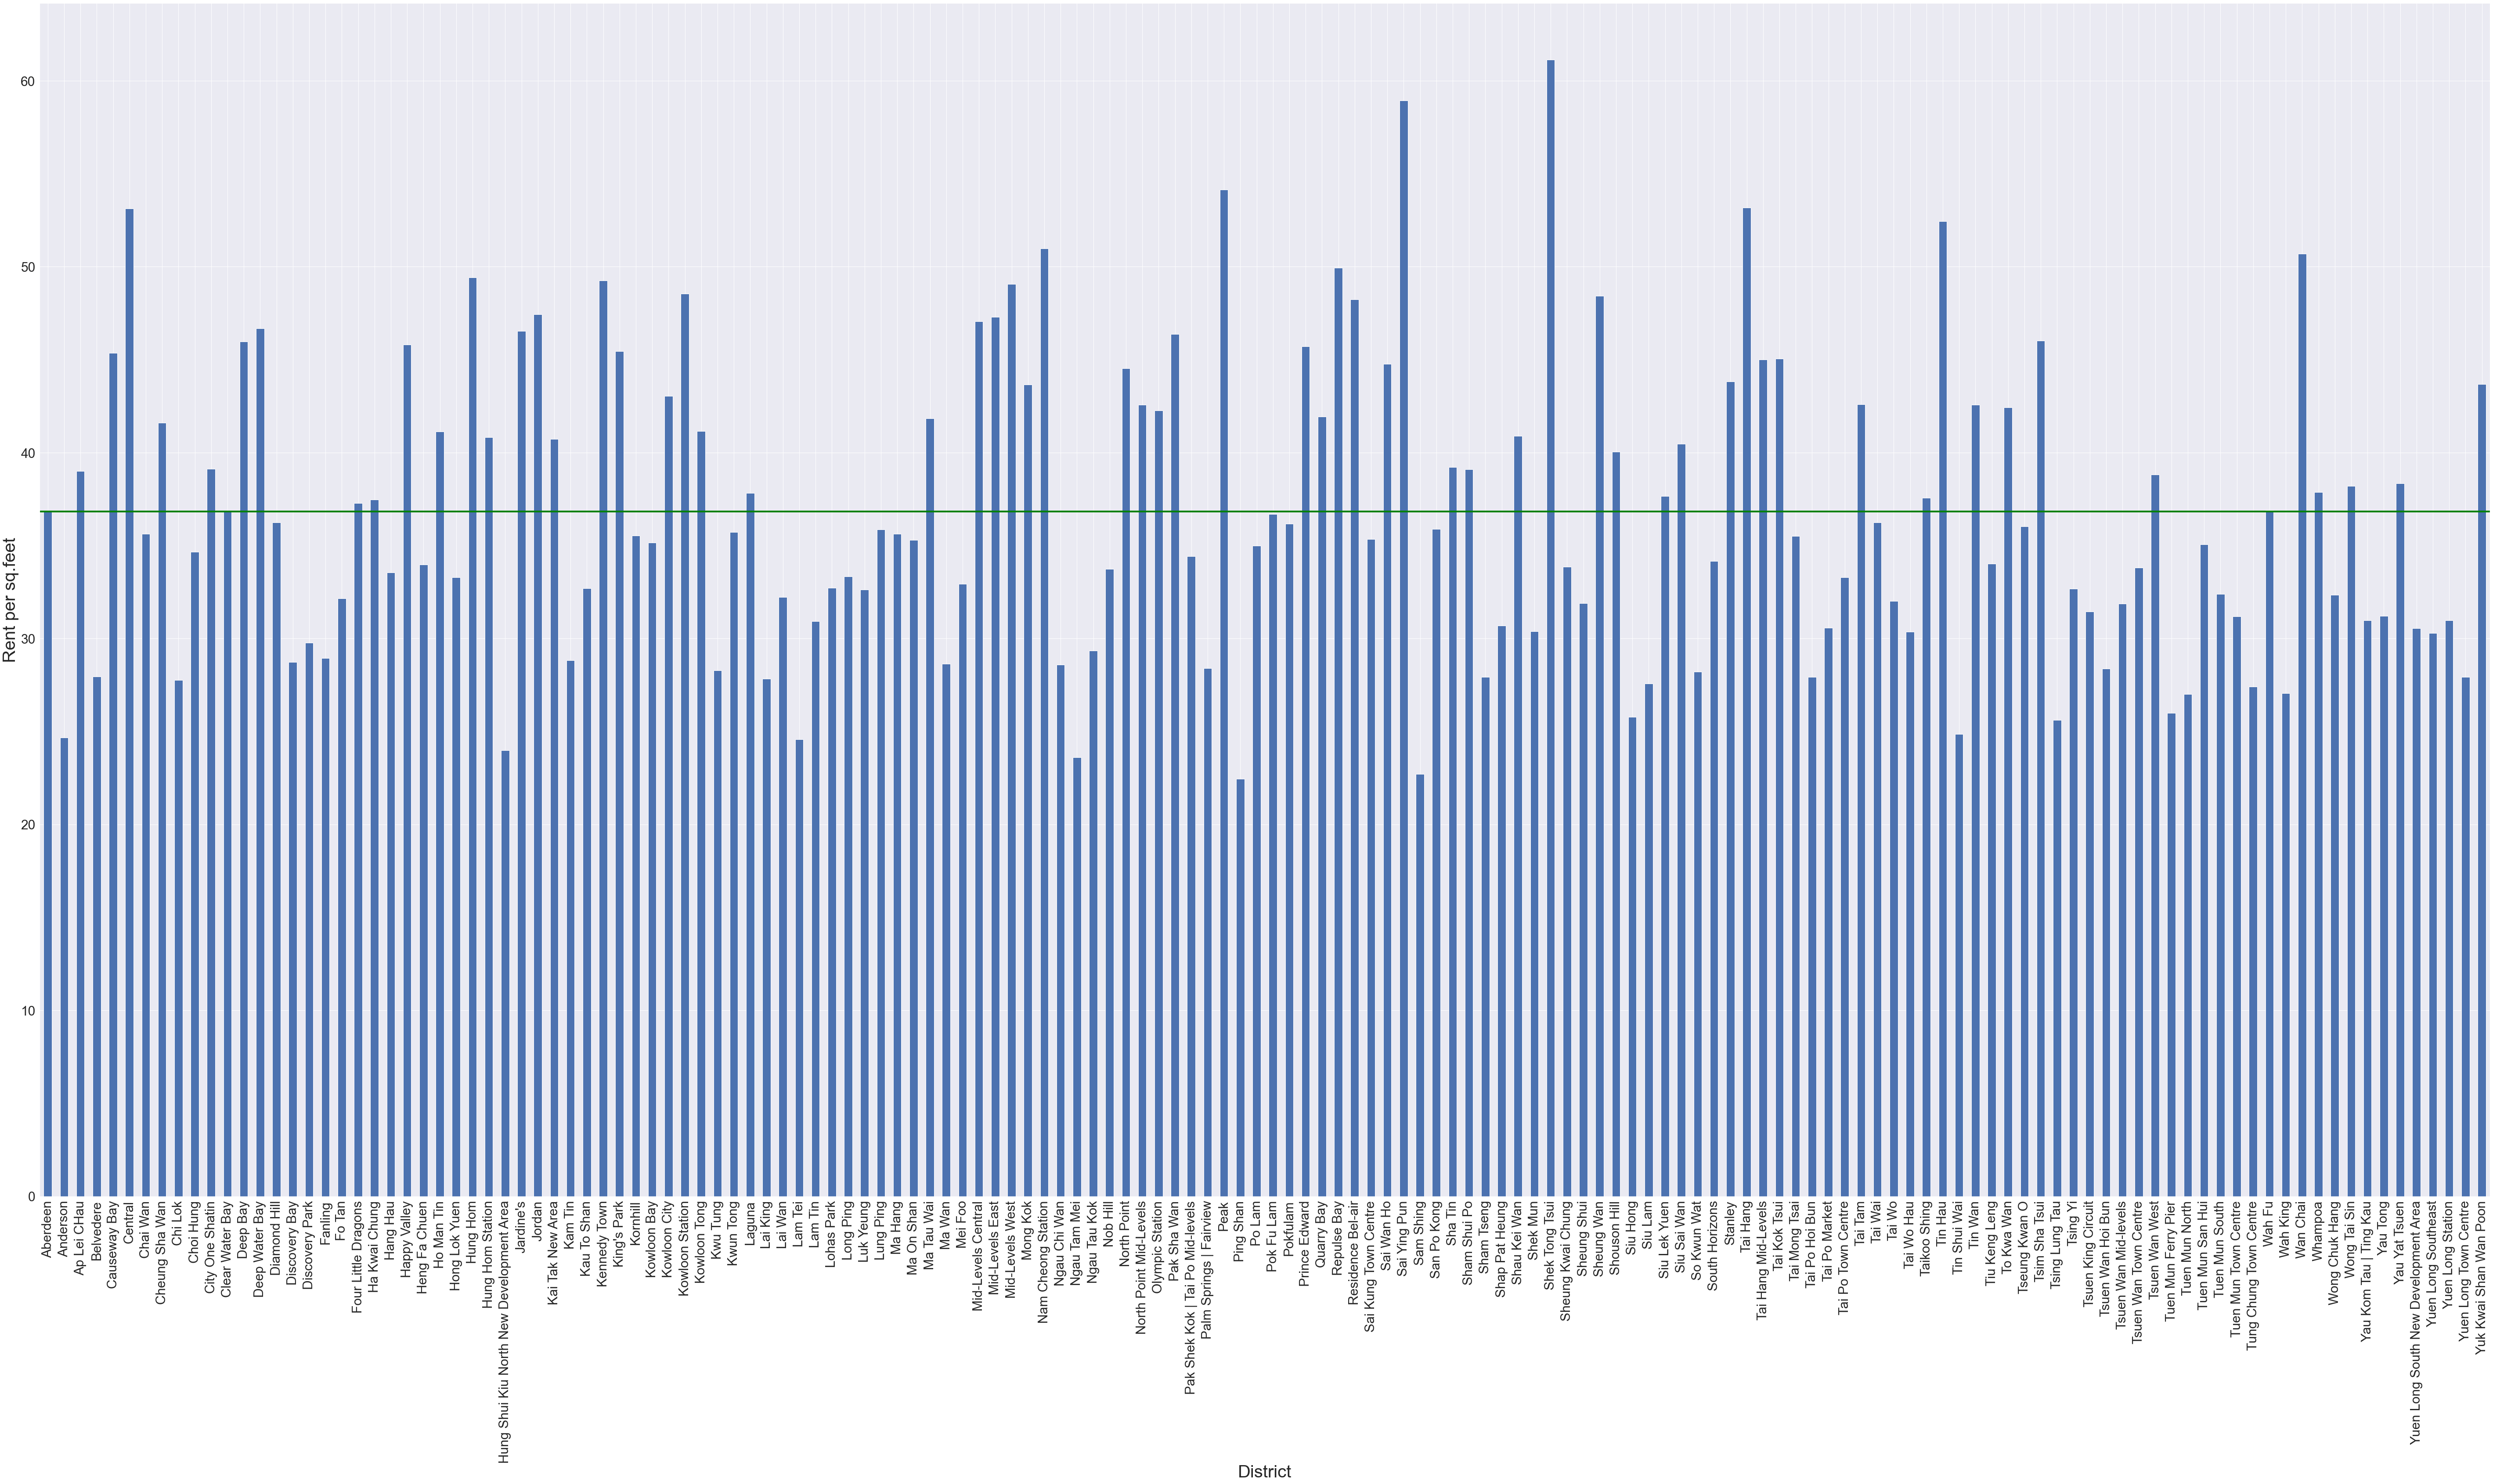

In [154]:
fig,axes = plt.subplots(figsize=(100,50))
df.groupby('District')["Price/ft2(SA)"].mean().plot.bar()
plt.tick_params(axis='both', which='major', labelsize=30)
#plt.tick_params(axis='x', which='major', labelsize=30)
plt.ylabel( 'Rent per sq.feet', size=40)
plt.xlabel('District', size=40)
plt.axhline(df.groupby('District')["Price/ft2(SA)"].mean().mean(),color='green', linewidth=4)

In [35]:
df.groupby('District')["Price/ft2(SA)"].mean().mean()

36.84071205288618

In [34]:
rentbydistrict = df.groupby('District')["Price/ft2(SA)"].mean().sort_values(ascending=False)
rentbydistrict

District
Shek Tong Tsui                              61.135641
Sai Ying Pun                                58.929561
Peak                                        54.155714
Tai Hang                                    53.185000
Central                                     53.122000
                                              ...    
Lam Tei                                     24.574000
Hung Shui Kiu North New Development Area    23.993333
Ngau Tam Mei                                23.617143
Sam Shing                                   22.714000
Ping Shan                                   22.440000
Name: Price/ft2(SA), Length: 150, dtype: float64

(20.0, 51.047013647642686)

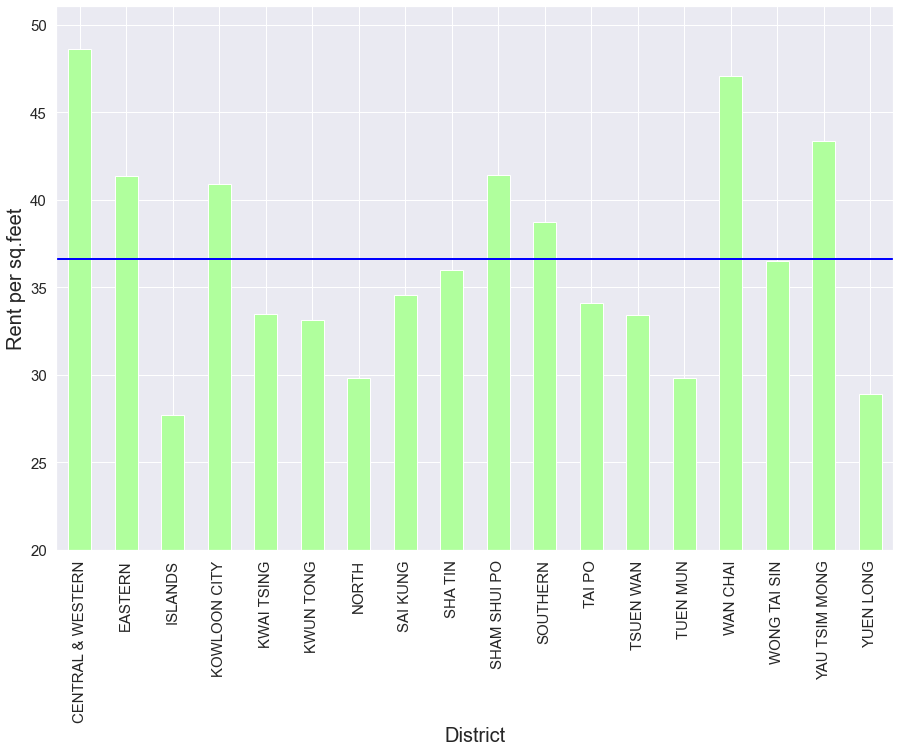

In [36]:
fig,axes = plt.subplots(figsize=(15,10))
df.groupby('District1')["Price/ft2(SA)"].mean().plot.bar(color='xkcd:pastel green')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('District', size=20)
plt.ylabel('Rent per sq.feet', size=20)
plt.axhline(df.groupby('District1')["Price/ft2(SA)"].mean().mean(),color='blue', linewidth=2)
plt.ylim(20)

Text(0.5, 1.0, 'Counts of Lower Level in each District')

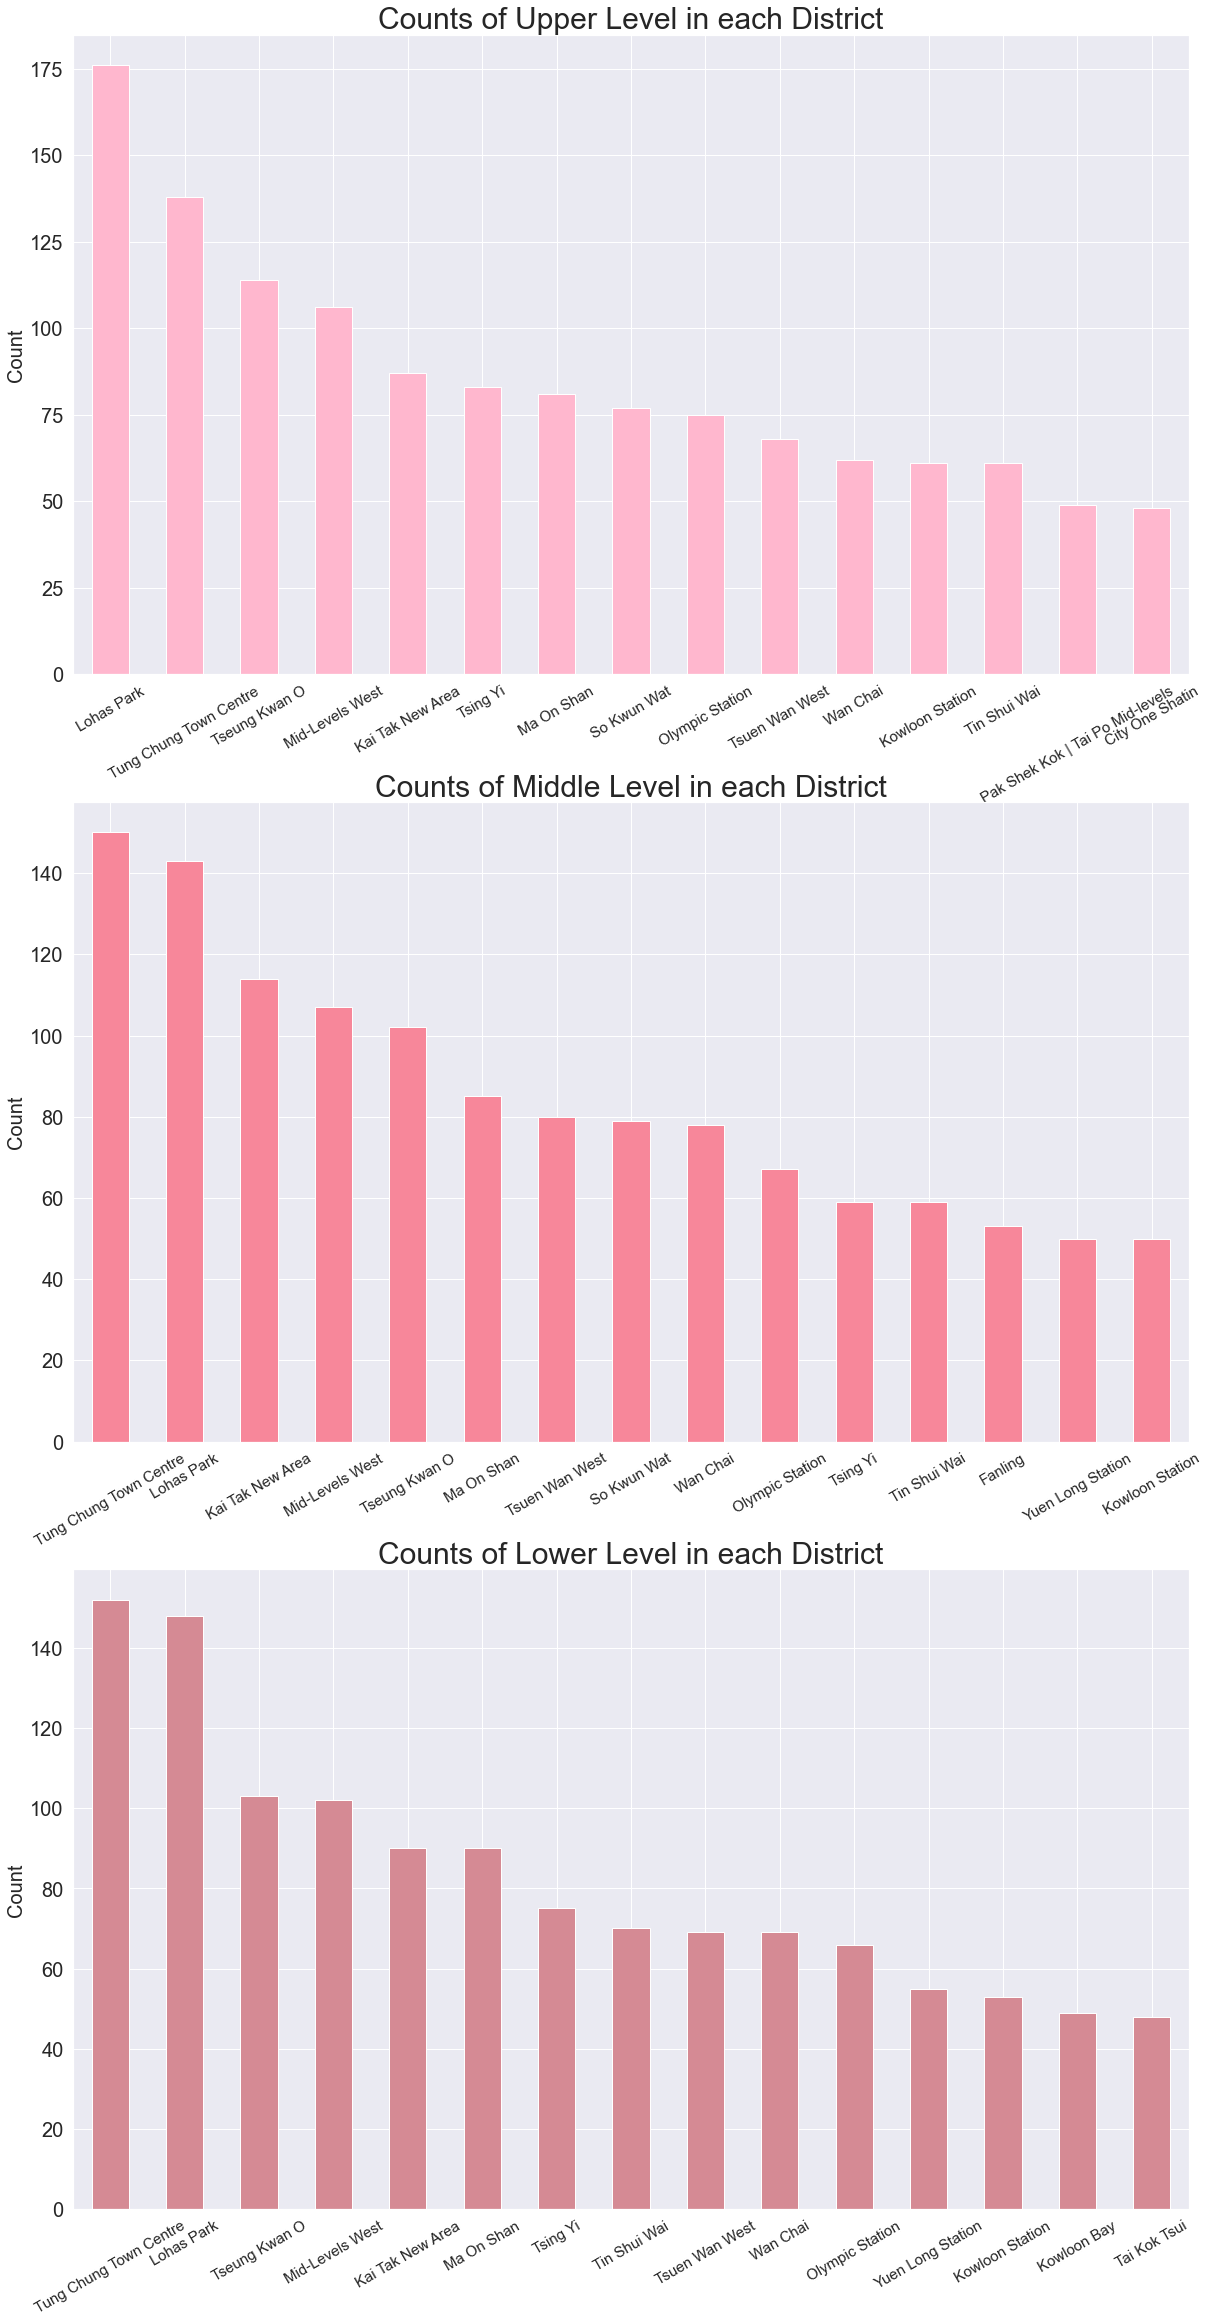

In [142]:
fig,axes = plt.subplots(3,1,figsize=(20,40))
df[df['Floor'] == 'H']['District'].value_counts()[:15].plot.bar(ax = axes[0], color = 'xkcd:baby pink')
df[df['Floor'] == 'M']['District'].value_counts()[:15].plot.bar(ax = axes[1], color = 'xkcd:rose pink')
df[df['Floor'] == 'L']['District'].value_counts()[:15].plot.bar(ax = axes[2], color = 'xkcd:dusty pink')

for i in range(3):
    axes[i].tick_params(axis='x', rotation=30,labelsize=15)
    axes[i].tick_params(axis='y',labelsize=20)
    axes[i].set_ylabel('Count', size = 20)
    
axes[0].set_title('Counts of Upper Level in each District', size = 30)
axes[1].set_title('Counts of Middle Level in each District', size = 30)
axes[2].set_title('Counts of Lower Level in each District', size = 30)

Text(0.5, 0, 'Date')

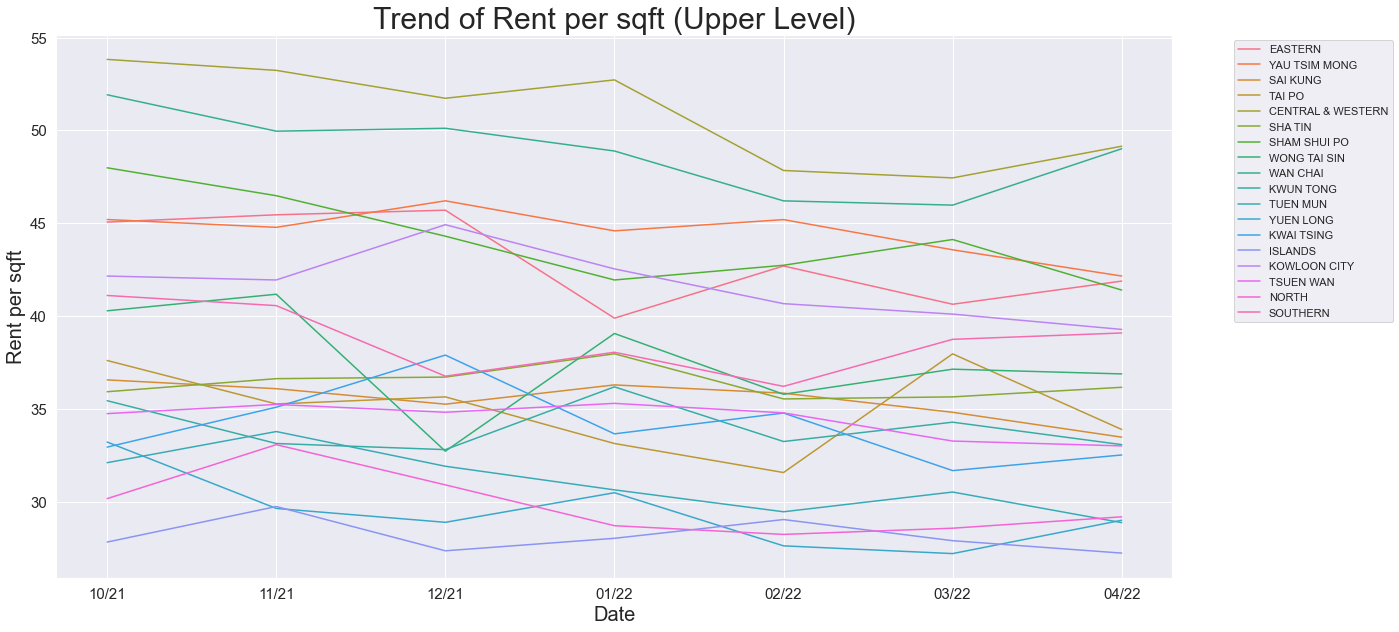

In [68]:
df3 = pd.DataFrame(df[df['Floor'] == 'H'])
x = sns.lineplot(data = df3, x = df["Date"].dt.strftime("%m/%y"), y = 'Price/ft2(SA)', hue = 'District1',err_style = None, sort=True)
x.invert_xaxis()
x.tick_params(axis='both',labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Trend of Rent per sqft (Upper Level)',size  = 30)
plt.ylabel('Rent per sqft',size = 20)
plt.xlabel('Date',size = 20)

Text(0.5, 0, 'Date')

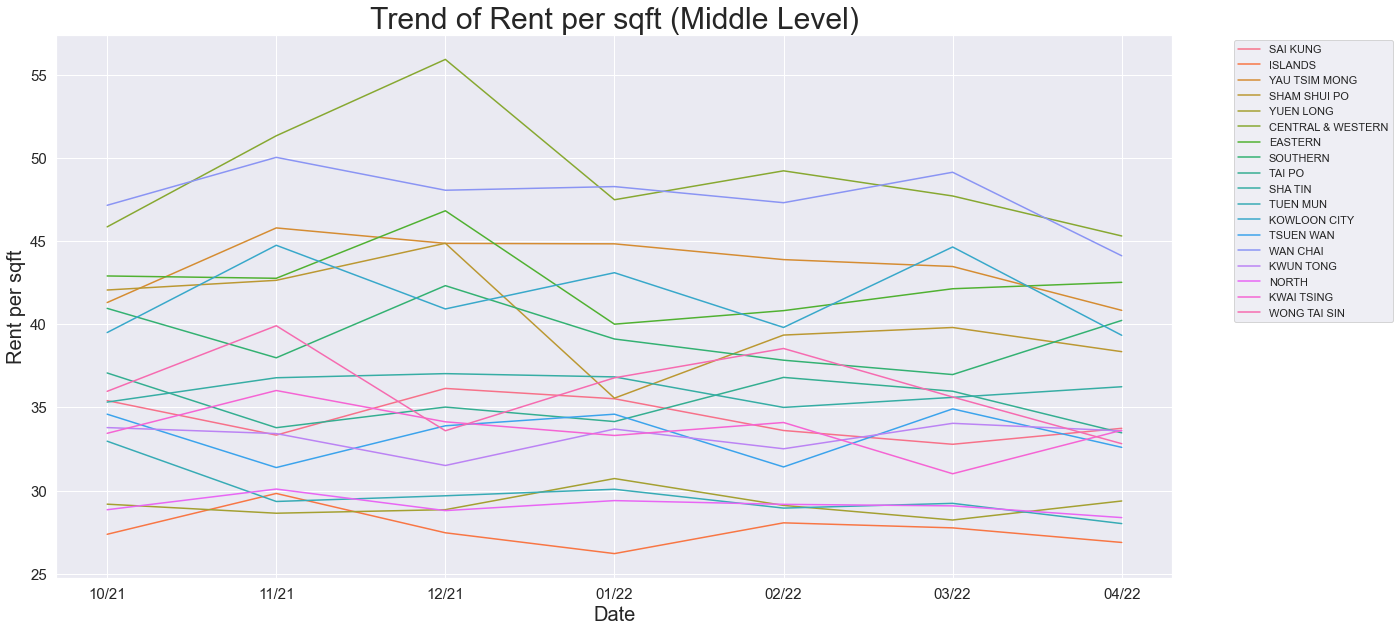

In [70]:
x = sns.lineplot(data = pd.DataFrame(df[df['Floor'] == 'M']), x = df["Date"].dt.strftime("%m/%y"), y = 'Price/ft2(SA)', hue = 'District1',err_style = None, sort=True)
x.invert_xaxis()
x.tick_params(axis='both',labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Trend of Rent per sqft (Middle Level)',size  = 30)
plt.ylabel('Rent per sqft',size = 20)
plt.xlabel('Date',size = 20)

Text(0.5, 0, 'Date')

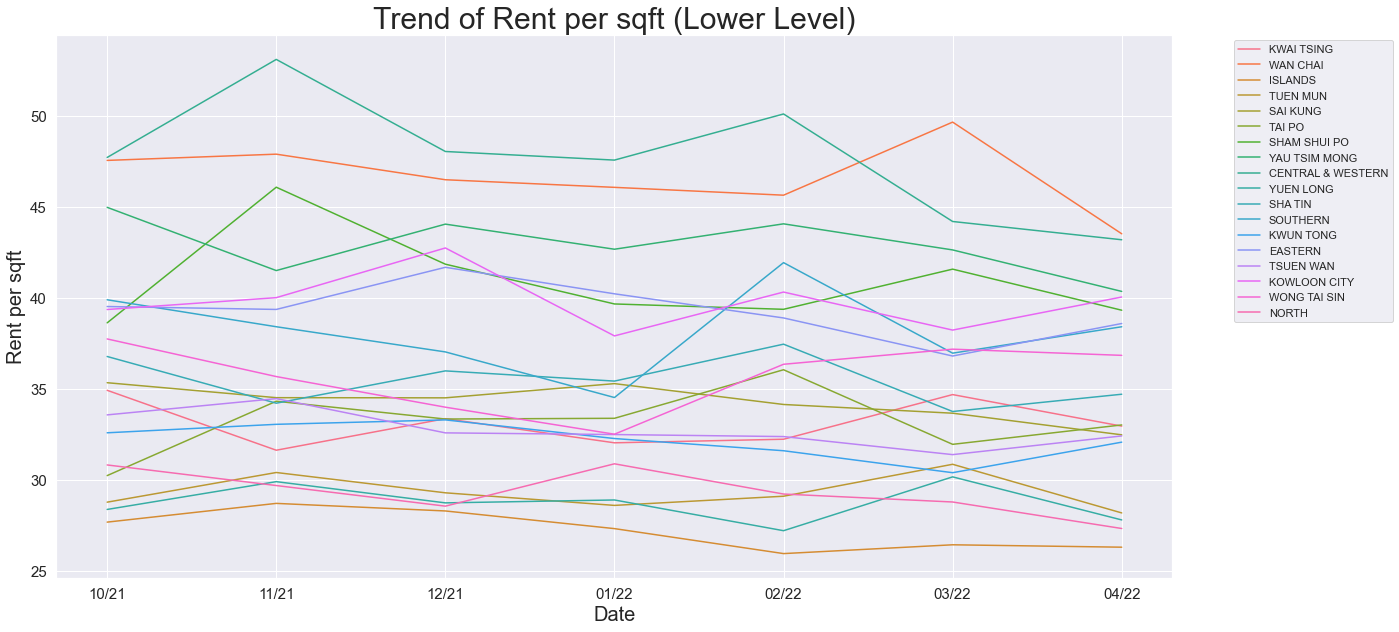

In [71]:
x = sns.lineplot(data = pd.DataFrame(df[df['Floor'] == 'L']), x = df["Date"].dt.strftime("%m/%y"), y = 'Price/ft2(SA)', hue = 'District1',err_style = None)
x.invert_xaxis()
x.tick_params(axis='both',labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Trend of Rent per sqft (Lower Level)',size  = 30)
plt.ylabel('Rent per sqft',size = 20)
plt.xlabel('Date',size = 20)

In [151]:
df_L = pd.DataFrame(pd.DataFrame(df[df['Floor'] == 'L']).groupby(['District1',df["Date"].dt.strftime("%m/%y")])['Price/ft2(SA)'].mean()).reset_index()
x = df_L.groupby('District1')['Price/ft2(SA)'].var()
x.reset_index().sort_values('Price/ft2(SA)',ascending=False)

,District1,Price/ft2(SA)
0,CENTRAL & WESTERN,11.242219
9,SHAM SHUI PO,6.595380
10,SOUTHERN,5.534533
14,WAN CHAI,3.747452
15,WONG TAI SIN,3.516411
11,TAI PO,3.290606
16,YAU TSIM MONG,2.582946
3,KOWLOON CITY,2.534278
1,EASTERN,2.235280
8,SHA TIN,1.831650


In [152]:
df_M = pd.DataFrame(pd.DataFrame(df[df['Floor'] == 'M']).groupby(['District1',df["Date"].dt.strftime("%m/%y")])['Price/ft2(SA)'].mean()).reset_index()
x = df_M.groupby('District1')['Price/ft2(SA)'].var()
x.reset_index().sort_values('Price/ft2(SA)',ascending=False)

,District1,Price/ft2(SA)
0,CENTRAL & WESTERN,13.465971
9,SHAM SHUI PO,9.463576
15,WONG TAI SIN,6.354713
3,KOWLOON CITY,5.748347
1,EASTERN,4.672762
10,SOUTHERN,3.666447
14,WAN CHAI,3.541373
16,YAU TSIM MONG,3.482878
13,TUEN MUN,2.423660
12,TSUEN WAN,2.325520


In [153]:
df_H = pd.DataFrame(pd.DataFrame(df[df['Floor'] == 'H']).groupby(['District1',df["Date"].dt.strftime("%m/%y")])['Price/ft2(SA)'].mean()).reset_index()
x = df_H.groupby('District1')['Price/ft2(SA)'].var()
x.reset_index().sort_values('Price/ft2(SA)',ascending=False)

,District1,Price/ft2(SA)
15,WONG TAI SIN,8.323637
0,CENTRAL & WESTERN,7.062706
9,SHAM SHUI PO,5.769079
1,EASTERN,5.697793
11,TAI PO,5.422770
14,WAN CHAI,4.590248
4,KWAI TSING,4.298710
17,YUEN LONG,4.029381
3,KOWLOON CITY,3.467501
10,SOUTHERN,3.295222


Text(0.5, 0, 'Date')

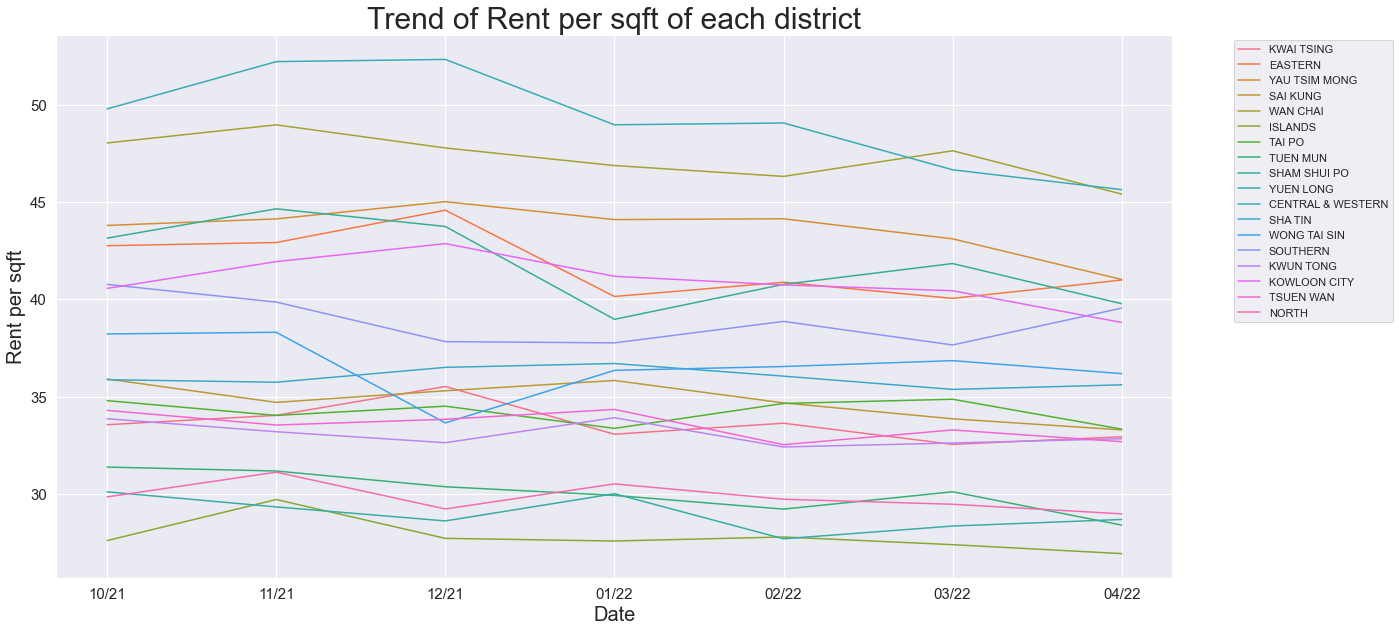

In [157]:
x = sns.lineplot(data = df, x = df["Date"].dt.strftime("%m/%y"), y = 'Price/ft2(SA)', hue = 'District1',err_style = None, sort=True)
x.invert_xaxis()
x.tick_params(axis='both',labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Trend of Rent per sqft of each district',size  = 30)
plt.ylabel('Rent per sqft',size = 20)
plt.xlabel('Date',size = 20)

In [160]:
df_all = pd.DataFrame(df.groupby(['District1',df["Date"].dt.strftime("%m/%y")])['Price/ft2(SA)'].mean()).reset_index()
x = df_all.groupby('District1')['Price/ft2(SA)'].var()
x.reset_index().sort_values('Price/ft2(SA)',ascending=False)

,District1,Price/ft2(SA)
0,CENTRAL & WESTERN,6.409197
9,SHAM SHUI PO,4.479968
1,EASTERN,2.866646
15,WONG TAI SIN,2.424159
16,YAU TSIM MONG,1.629822
3,KOWLOON CITY,1.619878
10,SOUTHERN,1.471448
14,WAN CHAI,1.397536
13,TUEN MUN,1.096603
7,SAI KUNG,0.953587
